In [1]:
import sys
sys.path.append('..')

from CONSTS import IMAGEPATH, MASKPATH, FASHION_WEAR_GIT_CODE
from utils.utils import read_image, read_mask, cut_mask
from scipy.io import loadmat

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import torch
import os

In [2]:
list(map(lambda x: print(x), [(i, loadmat('datasets/label_list.mat')['label_list'][0][i][0]) for i in range(59)]))

(0, 'null')
(1, 'accessories')
(2, 'bag')
(3, 'belt')
(4, 'blazer')
(5, 'blouse')
(6, 'bodysuit')
(7, 'boots')
(8, 'bra')
(9, 'bracelet')
(10, 'cape')
(11, 'cardigan')
(12, 'clogs')
(13, 'coat')
(14, 'dress')
(15, 'earrings')
(16, 'flats')
(17, 'glasses')
(18, 'gloves')
(19, 'hair')
(20, 'hat')
(21, 'heels')
(22, 'hoodie')
(23, 'intimate')
(24, 'jacket')
(25, 'jeans')
(26, 'jumper')
(27, 'leggings')
(28, 'loafers')
(29, 'necklace')
(30, 'panties')
(31, 'pants')
(32, 'pumps')
(33, 'purse')
(34, 'ring')
(35, 'romper')
(36, 'sandals')
(37, 'scarf')
(38, 'shirt')
(39, 'shoes')
(40, 'shorts')
(41, 'skin')
(42, 'skirt')
(43, 'sneakers')
(44, 'socks')
(45, 'stockings')
(46, 'suit')
(47, 'sunglasses')
(48, 'sweater')
(49, 'sweatshirt')
(50, 'swimwear')
(51, 't-shirt')
(52, 'tie')
(53, 'tights')
(54, 'top')
(55, 'vest')
(56, 'wallet')
(57, 'watch')
(58, 'wedges')


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [3]:
loadmat('datasets/label_list.mat')

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Aug 13 20:13:52 2014',
 '__version__': '1.0',
 '__globals__': [],
 'label_list': array([[array(['null'], dtype='<U4'),
         array(['accessories'], dtype='<U11'),
         array(['bag'], dtype='<U3'), array(['belt'], dtype='<U4'),
         array(['blazer'], dtype='<U6'), array(['blouse'], dtype='<U6'),
         array(['bodysuit'], dtype='<U8'), array(['boots'], dtype='<U5'),
         array(['bra'], dtype='<U3'), array(['bracelet'], dtype='<U8'),
         array(['cape'], dtype='<U4'), array(['cardigan'], dtype='<U8'),
         array(['clogs'], dtype='<U5'), array(['coat'], dtype='<U4'),
         array(['dress'], dtype='<U5'), array(['earrings'], dtype='<U8'),
         array(['flats'], dtype='<U5'), array(['glasses'], dtype='<U7'),
         array(['gloves'], dtype='<U6'), array(['hair'], dtype='<U4'),
         array(['hat'], dtype='<U3'), array(['heels'], dtype='<U5'),
         array(['hoodie'], dtype='<U6'), arr

In [4]:
clothing_labels = loadmat(f'datasets/label_list.mat')['label_list']
cloth2code = dict(zip([clothing_labels[0, index][0] for index in range(59)], [index for index in range(59)]))
code2cloth = dict(zip([index for index in range(59)], [clothing_labels[0, index][0] for index in range(59)]))

In [5]:
# pd.DataFrame(cloth2code.items(), columns=['CLOTH', 'CODE']).to_parquet('data/cloth2code.parquet')

In [6]:
def load_specific_image(image_path, mask_path, objects=[31, 40], count=10):
    return_info = {
        'objects' : {},
        'objects_count': {}
    }
    masks = os.listdir(MASKPATH)
    for mask in tqdm(masks):
        mask_array = read_mask(mask)
        classes = np.unique(mask_array)
        image_name = f'{mask.split(".")[0]}'
        image_array = read_image(image_name)
        for object_ in objects:
            if object_ in classes:
                if object_ not in return_info['objects_count']:
                    return_info['objects_count'][object_] = 0
                if object_ not in return_info['objects']:
                    return_info['objects'][object_] = []
                    
                return_info['objects_count'][object_] += 1
                return_info['objects'][object_].append(image_name.split('.')[0])
    return return_info

In [7]:
specific_image_annotations = load_specific_image(IMAGEPATH, MASKPATH)

100%|██████████| 1004/1004 [00:14<00:00, 70.92it/s]


In [64]:
# isinstance(image, np.ndarray)
# type(np.array(image))

False

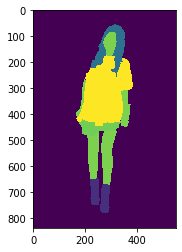

In [14]:
mask_name = specific_image_annotations['objects'][40][1]
mask = read_mask(mask_name)
plt.imshow(mask)
image = read_image(mask_name)
# plt.imshow(image)
# cut_mask(image, mask, 40)

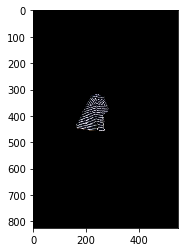

In [40]:
import cv2
cloth_mask = np.where(mask == 40, mask, 0)
res = cv2.bitwise_and(np.array(image), np.array(image), mask = cloth_mask)
plt.imshow(res)
# image
# mask

In [12]:
img = np.array([[1,2], [1,2]])
mask = [[True, False], [False, True]]
# a = np.putmask(img, img > 1, 0)

In [41]:
x = np.arange(6).reshape(2, 3)
np.putmask(img, mask, 0)
img

array([[0, 2],
       [1, 0]])

array([[1, 0],
       [3, 4]])